In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("F:/Datasets/MachineLearningDatsets/Placement_Data.csv")

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.drop(columns=["sl_no"], inplace=True)

In [5]:
df.fillna(0, inplace=True)

In [6]:
col=["ssc_p", "hsc_p", "etest_p", "mba_p", "salary"]

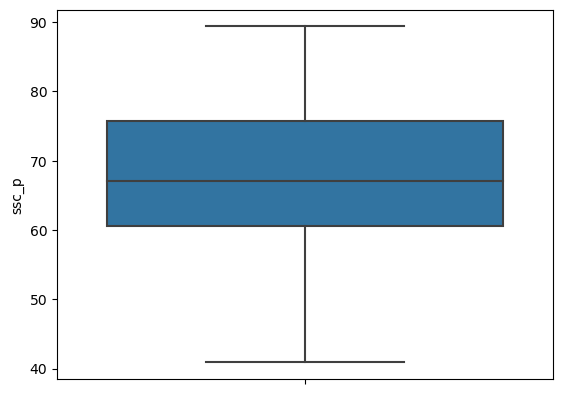

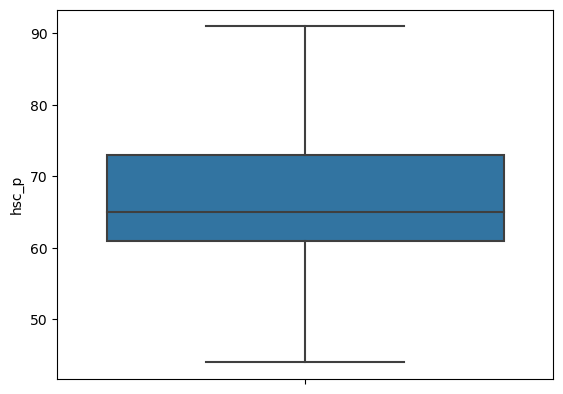

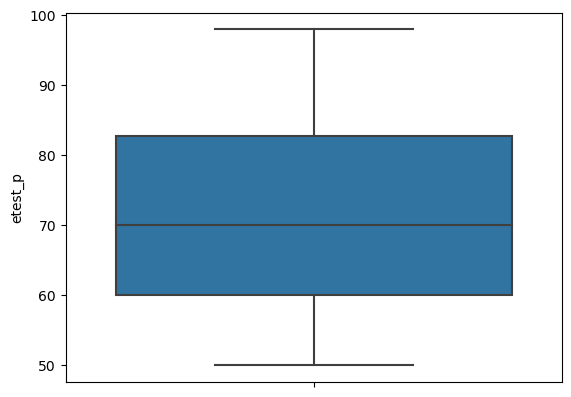

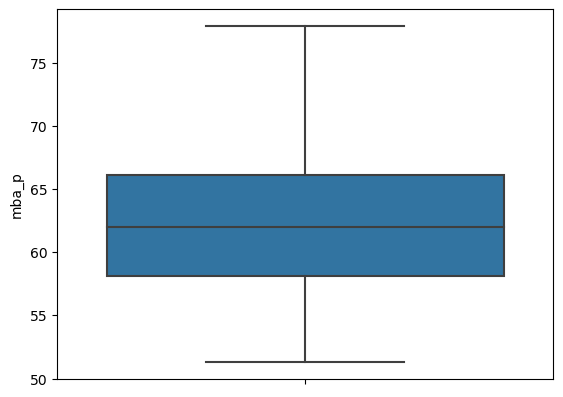

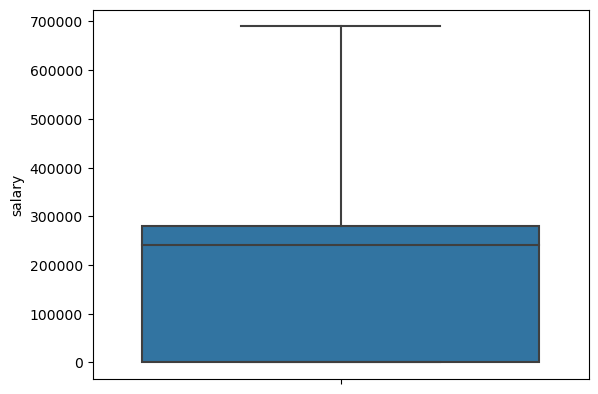

In [7]:
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[df[c]<=upper_limit]
  df=df[df[c]>=lower_limit]
  plt.figure()
  sns.boxplot(y=c, data=df)

### Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [9]:
col1=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]

In [10]:
for c in col1:
  df[c]=le.fit_transform(df[c])

In [11]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc =StandardScaler()

In [14]:
df2=sc.fit_transform(df)

In [19]:
df3=pd.DataFrame(df2,columns=['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'])

In [18]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [20]:
df3

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0.740859,-0.055880,1.091554,2.524827,0.804984,-0.642317,-1.153980,1.574447,-0.725208,-1.285004,1.113162,-0.605522,0.656167,0.516607
1,0.740859,1.102474,-0.916125,1.217221,0.804984,1.098701,1.522974,1.574447,1.378916,1.127669,-0.898342,0.698112,0.656167,0.023232
2,0.740859,-0.243772,-0.916125,0.151115,-1.242260,-2.383335,-0.329456,-0.670093,-0.725208,0.246852,-0.898342,-0.779805,0.656167,0.375643
3,0.740859,-1.089285,-0.916125,-1.500163,-1.242260,1.098701,-1.978504,1.574447,-0.725208,-0.442483,1.113162,-0.495724,-1.524002,-1.386413
4,0.740859,1.710305,-0.916125,0.729062,-1.242260,-0.642317,0.948556,-0.670093,-0.725208,1.916574,-0.898342,-1.180655,0.656167,1.609082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.740859,1.221786,1.091554,1.595983,0.804984,-0.642317,1.539465,-0.670093,-0.725208,1.472336,-0.898342,2.128972,0.656167,1.432876
202,0.740859,-0.901393,1.091554,-0.674524,0.804984,1.098701,0.769909,1.574447,-0.725208,0.170259,-0.898342,-1.508306,0.656167,0.551848
203,0.740859,-0.055880,1.091554,0.047910,0.804984,-0.642317,0.907330,-0.670093,1.378916,-0.978633,-0.898342,1.297644,0.656167,0.692813
204,-1.349784,0.601742,1.091554,-0.055295,0.804984,-0.642317,-1.153980,-0.670093,-0.725208,-0.136112,1.113162,-0.356298,0.656167,0.051425


In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans=KMeans(10)

In [23]:
kmeans.fit(df3)

KMeans(n_clusters=10)

In [25]:
kmeans.predict(df3)

array([7, 4, 1, 6, 1, 0, 0, 4, 1, 6, 3, 1, 8, 9, 6, 9, 1, 8, 8, 2, 7, 2,
       5, 5, 0, 2, 7, 2, 6, 9, 8, 9, 2, 0, 9, 6, 9, 3, 5, 9, 0, 2, 2, 8,
       8, 1, 7, 9, 6, 0, 5, 3, 3, 7, 1, 3, 3, 4, 1, 5, 0, 7, 0, 7, 2, 8,
       4, 5, 2, 2, 1, 1, 8, 9, 5, 5, 8, 7, 2, 6, 5, 4, 2, 7, 6, 9, 5, 2,
       6, 9, 6, 1, 1, 9, 8, 9, 6, 0, 1, 2, 4, 3, 6, 0, 2, 1, 6, 9, 0, 7,
       2, 3, 5, 1, 5, 4, 4, 1, 7, 4, 9, 5, 3, 4, 2, 6, 5, 7, 3, 3, 6, 7,
       5, 1, 3, 6, 4, 2, 0, 5, 3, 1, 9, 6, 4, 1, 5, 5, 3, 0, 4, 1, 0, 6,
       4, 0, 2, 5, 9, 8, 7, 0, 6, 0, 2, 7, 0, 5, 0, 3, 5, 8, 3, 6, 0, 9,
       0, 9, 6, 4, 0, 8, 0, 7, 1, 9, 0, 1, 5, 5, 8, 7, 7, 6, 4, 7, 2, 7,
       2, 8, 1, 2, 5, 2, 7, 6])

In [26]:
df['clusters']=kmeans.predict(df3)

In [27]:
kmeans.inertia_

1440.857548612314

In [28]:
inertia=[]
for i in range(1,21):
    kmeans=KMeans(i)
    kmeans.fit(df.drop(['clusters'],axis=1))
    inertia.append(kmeans.inertia_)

2023-02-09 12:14:00,122 [1348] WARNING  py.warnings:109: [JupyterRequire] C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



In [29]:
inertia

[4146751032899.2705,
 714948518604.6677,
 252412404738.7795,
 154356650252.8729,
 81283194231.26012,
 51494215085.92767,
 29755080513.70224,
 17528355463.869534,
 9715912234.079536,
 7477498455.278927,
 5824395301.752536,
 4351072088.702673,
 3378348779.231218,
 2685387877.575386,
 2063458867.2532477,
 1817084436.9575772,
 1510315119.0512054,
 1271898625.317705,
 1020805604.908972,
 804113646.191552]

Text(0, 0.5, 'Inertia')

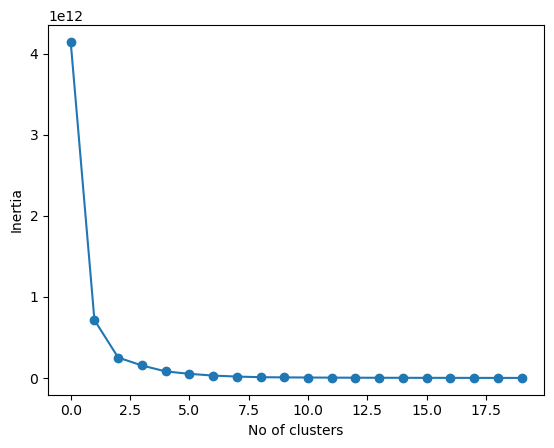

In [30]:
plt.plot(inertia, marker="o")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")